<a href="https://colab.research.google.com/github/LiscaAngriani/APM_Kelompok3/blob/main/Gaussian_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
#Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 

# Importing the data
dataset= pd.read_csv('Pengunjung_Mall.csv')  
X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,4].values

In [81]:
dataset.head()

,Id,Gender,Usia,Pendapatan_Tahunan_Ribuan_USD,Pengeluaran_USD
0,1,Pria,19,15,39
1,2,Pria,21,15,81
2,3,Wanita,20,16,6
3,4,Wanita,23,16,77
4,5,Wanita,31,17,40


In [82]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=5)

In [83]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) #menjaga nilai dalam range
X_test = sc_X.fit_transform(X_test)

In [84]:
#Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train,y_train)

GaussianNB()

In [85]:
#Predicting the Test set results 
y_pred = classifier.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
ac = accuracy_score(y_test,y_pred)
print(ac)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.04


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

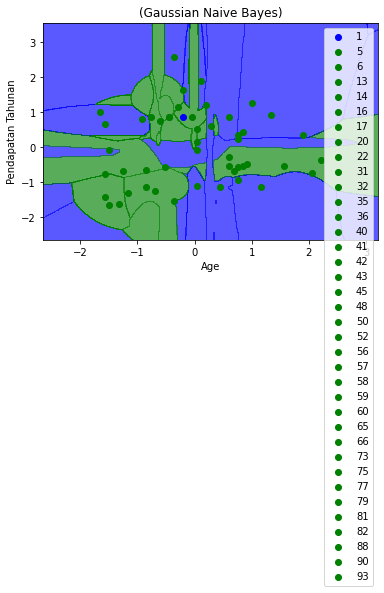

In [87]:
# Visualising the Test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.65, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('(Gaussian Naive Bayes)')
plt.xlabel('Age')
plt.ylabel('Pendapatan Tahunan')
plt.legend()
plt.show()